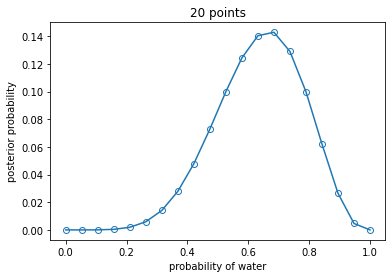

In [2]:
import numpy as np
import arviz as az
from scipy.stats import binom, mode
import matplotlib.pyplot as plt
gridsize = 20
p_grid = np.linspace(0,1,gridsize)
prior = np.repeat(1,gridsize)
likelihood = binom.pmf(6,9,p_grid)
unstd_posterior = likelihood * prior
posterior = unstd_posterior/sum(unstd_posterior)
plt.plot(p_grid, posterior, "o-", fillstyle="none")
plt.xlabel("probability of water")
plt.ylabel("posterior probability")
plt.title("%d points" % gridsize)
plt.show()

In [3]:
import pymc3 as pm
data = np.repeat((0, 1), (3, 6))
with pm.Model() as normal_approximation:
    p = pm.Uniform('p', 0, 1)
    w = pm.Binomial('w', n=len(data), p=p, observed=data.sum())
    mean_q = pm.find_MAP()
    std_q = ((1/pm.find_hessian(mean_q, vars=[p]))**0.5)[0]
mean_q['p'], std_q

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


(array(0.66666667), array([0.15713484]))

In [4]:
baseModel = pm.Model()
with baseModel:
    p = pm.Uniform('p', 0, 1)
    w = pm.Binomial('w', n=len(data), p=p, observed=data.sum())
    trace = pm.sample(10000, return_inferencedata=False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 62 seconds.
The acceptance probability does not match the target. It is 0.8867597379118058, but should be close to 0.8. Try to increase the number of tuning steps.


In [6]:
from scipy.stats import mode
import numpy as np 

trace['p']
def PI(samples, prob:float=0.89):
    # assume its symmetric
    side = (1-prob)/2
    return np.quantile(samples, (side, 1-side))

def MAP(samples, decimals = 4):
    return mode(np.round(samples,decimals))

def HDPI(samples, precision = 4):
    rounded = np.rounded(samples, decimals)
    pass
PI(trace['p'])
MAP(trace['p'])

ModeResult(mode=array([0.5985]), count=array([28]))

/srv/conda/envs/notebook/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/srv/conda/envs/notebook/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
p,0.64,0.14,0.38,0.88,0.0,0.0,17319.57,16991.89,17348.81,24231.01,1.0


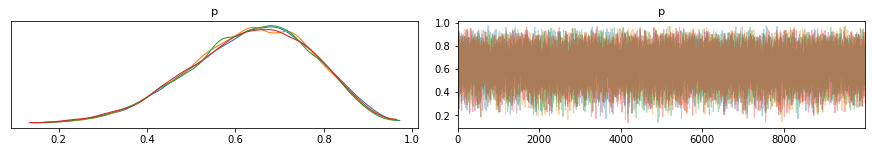

In [11]:
import arviz as az
az.plot_trace(trace)
az.summary(trace, round_to=2)